In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('advertising.csv')


In [5]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03/06/2016 3:36,0


In [6]:
import seaborn as sns

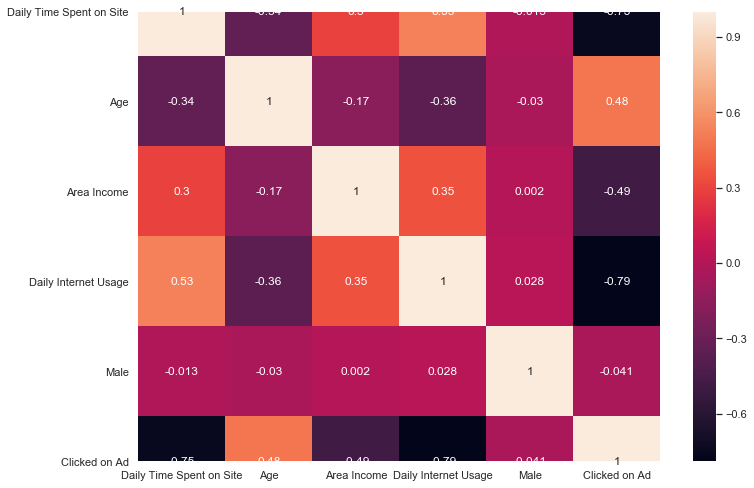

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.corr(), annot=True)

In [15]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

Q) How 'age' of the person, affects the user advertisement click.

In [22]:
data['Age'].isnull().sum()

0

In [21]:
click_by_age=data.groupby('Age')['Clicked on Ad'].value_counts()

In [25]:
click_by_age

Age  Clicked on Ad
19   0                3
     1                1
20   0                5
     1                1
21   0                5
                     ..
57   1                5
58   1                4
59   1                2
60   1                4
61   1                1
Name: Clicked on Ad, Length: 75, dtype: int64

In [26]:
click_by_age=click_by_age.groupby(level=0).apply(lambda x: round(100*x/x.sum()))

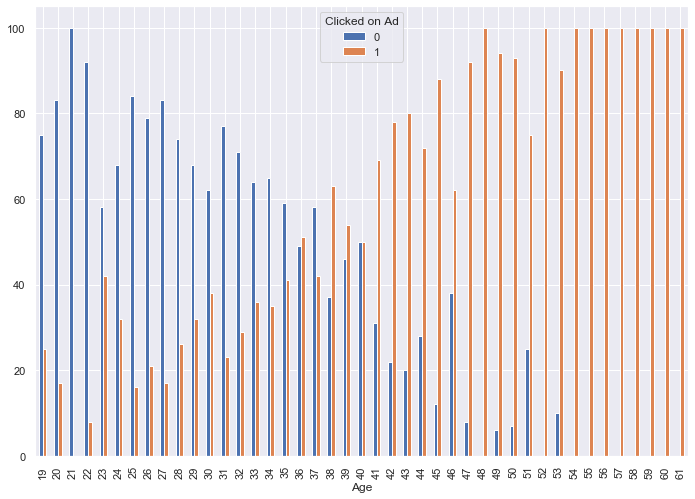

In [30]:
click_by_age.unstack().plot(kind='bar')

Clearly as the age of the people increase the more prone they are to click on an ad.

Q) How 'gender' of the person, affects the user advertisement click.

In [35]:
data.rename(columns={'Male':'Gender'}, inplace='True')

In [46]:
click_by_gender=data.groupby('Gender')['Clicked on Ad'].value_counts()

In [48]:
click_by_gender

Gender  Clicked on Ad
0       1                236
        0                229
1       0                232
        1                203
Name: Clicked on Ad, dtype: int64

In [75]:
click_by_gender.unstack().rename(columns={0: 'male', 1: 'female'})

Clicked on Ad,male,female
Gender,,
0,229,236
1,232,203


Text(0, 0.5, 'Number of people')

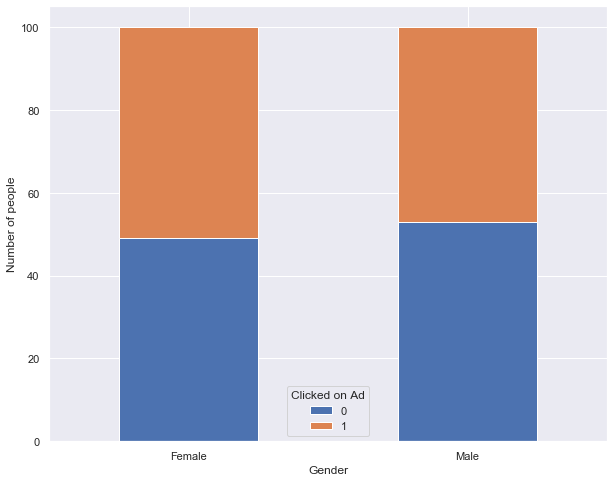

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
click_by_gender.unstack().rename(index={1: 'Male', 0: 'Female'}).apply(lambda x: round(100*x/x.sum()), axis=1).plot(kind='bar', stacked=True)
sns.set(rc={'figure.figsize': (10,8)})
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Number of people')

In [128]:
click_by_gender.unstack().apply(lambda x: round(100*x/x.sum()), axis=1)

Clicked on Ad,0,1
Gender,,
0,49.0,51.0
1,53.0,47.0


As clear from the figure men tend to click the ads more than women do. Since out of 100 men 53 clicked on the ad.

Q) How 'country' of the person, affects the user advertisement click.

In [142]:
click_by_country=data.groupby('Country')['Clicked on Ad'].value_counts()

In [143]:
click_by_country

Country      Clicked on Ad
Afghanistan  1                5
             0                2
Albania      0                3
             1                3
Algeria      0                3
                             ..
Yemen        1                1
Zambia       1                3
             0                1
Zimbabwe     1                4
             0                1
Name: Clicked on Ad, Length: 412, dtype: int64

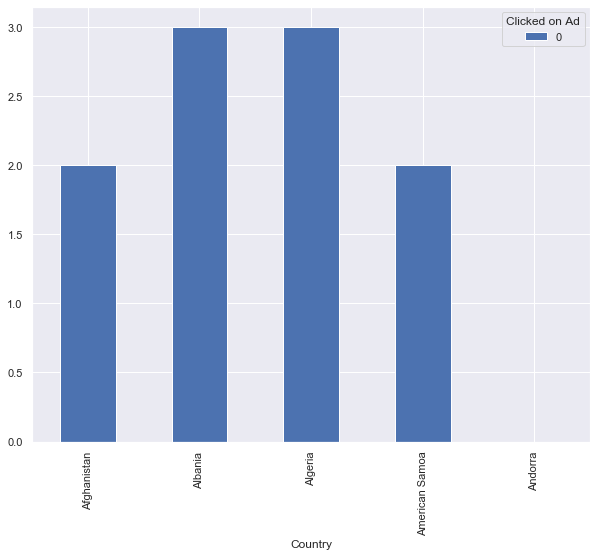

In [145]:
click_by_country.unstack().drop([1], axis=1).head().plot(kind='bar')

In [152]:
mpl_toolkits.basemap import Basemap 